In [32]:
import numpy as np
import pandas as pd
import os

from matplotlib import pyplot as plt
%matplotlib inline

In [37]:
os.getcwd()

'/Users/wenyang/PROJECT_MASTER/DataAnalysis_COVID2019'

In [42]:
confirmed_df = pd.read_csv("__COVID-19-master/time_series/time_series_2019-ncov-Confirmed.csv")
death_df = pd.read_csv("__COVID-19-master/time_series/time_series_2019-ncov-Deaths.csv")
recover_df = pd.read_csv("__COVID-19-master/time_series/time_series_2019-ncov-Recovered.csv")

In [43]:
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/21/20 22:00,1/22/20 12:00,1/23/20 12:00,1/24/20 0:00,1/24/20 12:00,1/25/20 0:00,...,2/8/20 23:04,2/9/20 10:30,2/9/20 23:20,2/10/20 10:30,2/10/20 19:30,2/11/20 10:50,2/11/20 20:44,2/12/20 10:20,2/12/20 22:00,2/13/20 10:00
0,Anhui,Mainland China,31.82571,117.2264,NaN,1.0,9.0,15.0,15.0,39.0,...,779.0,779.0,830.0,830.0,830.0,860,889,889,910,910
1,Beijing,Mainland China,40.18238,116.4142,10.0,14.0,22.0,26.0,36.0,36.0,...,326.0,326.0,337.0,337.0,337.0,342,342,352,366,366
2,Chongqing,Mainland China,30.05718,107.8740,5.0,6.0,9.0,27.0,27.0,57.0,...,446.0,450.0,468.0,473.0,486.0,489,505,509,518,525
3,Fujian,Mainland China,26.07783,117.9895,NaN,1.0,5.0,5.0,10.0,10.0,...,250.0,250.0,261.0,261.0,261.0,267,272,272,279,279
4,Gansu,Mainland China,36.06110,103.8343,NaN,NaN,2.0,2.0,2.0,4.0,...,79.0,79.0,83.0,83.0,86.0,86,86,86,87,87


In [44]:
confirmed_df.shape

(73, 47)

In [45]:
confirmed_df = confirmed_df.drop("Lat", axis=1).drop("Long", axis=1)
death_df = death_df.drop("Lat", axis=1).drop("Long", axis=1)
recover_df = recover_df.drop("Lat", axis=1).drop("Long", axis=1)

In [46]:
confirmed_df.head()

,Province/State,Country/Region,1/21/20 22:00,1/22/20 12:00,1/23/20 12:00,1/24/20 0:00,1/24/20 12:00,1/25/20 0:00,1/25/20 12:00,1/25/20 22:00,...,2/8/20 23:04,2/9/20 10:30,2/9/20 23:20,2/10/20 10:30,2/10/20 19:30,2/11/20 10:50,2/11/20 20:44,2/12/20 10:20,2/12/20 22:00,2/13/20 10:00
0,Anhui,Mainland China,NaN,1.0,9.0,15.0,15.0,39.0,39.0,60.0,...,779.0,779.0,830.0,830.0,830.0,860,889,889,910,910
1,Beijing,Mainland China,10.0,14.0,22.0,26.0,36.0,36.0,41.0,51.0,...,326.0,326.0,337.0,337.0,337.0,342,342,352,366,366
2,Chongqing,Mainland China,5.0,6.0,9.0,27.0,27.0,57.0,57.0,75.0,...,446.0,450.0,468.0,473.0,486.0,489,505,509,518,525
3,Fujian,Mainland China,NaN,1.0,5.0,5.0,10.0,10.0,18.0,18.0,...,250.0,250.0,261.0,261.0,261.0,267,272,272,279,279
4,Gansu,Mainland China,NaN,NaN,2.0,2.0,2.0,4.0,4.0,7.0,...,79.0,79.0,83.0,83.0,86.0,86,86,86,87,87


In [47]:
confirmed_df_by_hours = confirmed_df.iloc[:, 2:].rename(columns=getHourDiff).fillna(0)
death_df_by_hours = death_df.iloc[:, 2:].rename(columns=getHourDiff).fillna(0)
recover_df_by_hours = recover_df.iloc[:, 2:].rename(columns=getHourDiff).fillna(0)

In [48]:
confirmed_df_by_hours.head()

,0.0,14.0,38.0,50.0,62.0,74.0,86.0,96.0,109.0,121.0,...,433.07,444.5,457.33,468.5,477.5,492.83,502.73,516.33,528.0,540.0
0,0.0,1.0,9.0,15.0,15.0,39.0,39.0,60.0,60.0,70.0,...,779.0,779.0,830.0,830.0,830.0,860,889,889,910,910
1,10.0,14.0,22.0,26.0,36.0,36.0,41.0,51.0,68.0,68.0,...,326.0,326.0,337.0,337.0,337.0,342,342,352,366,366
2,5.0,6.0,9.0,27.0,27.0,57.0,57.0,75.0,75.0,110.0,...,446.0,450.0,468.0,473.0,486.0,489,505,509,518,525
3,0.0,1.0,5.0,5.0,10.0,10.0,18.0,18.0,35.0,35.0,...,250.0,250.0,261.0,261.0,261.0,267,272,272,279,279
4,0.0,0.0,2.0,2.0,2.0,4.0,4.0,7.0,7.0,14.0,...,79.0,79.0,83.0,83.0,86.0,86,86,86,87,87


In [49]:
confirmed_df_by_days = confirmed_df.iloc[:, 2:].rename(columns=getDayDiff).fillna(0)
death_df_by_days = death_df.iloc[:, 2:].rename(columns=getDayDiff).fillna(0)
recover_df_by_days = recover_df.iloc[:, 2:].rename(columns=getDayDiff).fillna(0)

In [50]:
recover_df_by_days.head()

,0.0,0.58,1.58,2.08,2.58,3.08,3.58,4.0,4.54,5.04,...,18.04,18.52,19.06,19.52,19.9,20.53,20.95,21.51,22.0,22.5
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,59.0,72.0,73.0,88.0,88.0,105,108,127,128,157
1,0.0,0.0,0.0,0.0,1.0,1.0,2.0,2.0,2.0,2.0,...,37.0,37.0,44.0,44.0,44.0,48,48,56,68,69
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,39.0,50.0,51.0,66.0,66.0,72,79,87,102,128
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,26.0,35.0,35.0,39.0,39.0,45,46,53,54,57
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12.0,15.0,16.0,17.0,21.0,24,24,29,31,34


In [51]:
starting_date = "1/21/20 22:00"

In [52]:
def getHours(cur_date):
    date, hr = cur_date.split(" ")
    m, d, y = date.split("/")
    hr, min = hr.split(":")
    return int(hr) + (int(min)/60) + (int(m)*31+int(d))*24

In [53]:
def getHourDiff(cur_date, start_date=starting_date):
    return round(getHours(cur_date)-getHours(start_date), 2)

def getDayDiff(cur_date, start_date=starting_date):
    return round(getHourDiff(cur_date, start_date) / 24, 2)

def getNormalizedDate(cur_date, start_date=starting_date):
    day = getDayDiff(cur_date, start_date) + 21.92
    month = 1
    while day > 31:
        month += 1
        day -= 31
    return "{}-{:02}".format(month, round(day))
    

In [54]:
getNormalizedDate("01/27/20 10:06")

'1-27'

In [56]:
name2index = {}
index2state = {}
for index in range(len(confirmed_df)):
    country, state = confirmed_df.iloc[index, 1], confirmed_df.iloc[index, 0]
    if pd.isnull(confirmed_df.iloc[index, 0]):
        name = country
    else:
        name = country + "_" + state
    name2index[name] = index
    index2state[index] = name

## 确诊人数(Confirmed Cases)

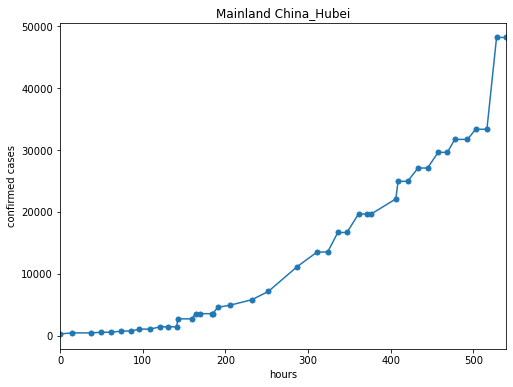

In [57]:
name = "Mainland China_Hubei"
temp_df = confirmed_df_by_hours.iloc[name2index[name],:];
plt.figure(figsize=(8,6))
temp_df.plot(title=name, marker='.', markersize=10)
plt.xlabel("hours")
plt.ylabel("confirmed cases")
plt.show()

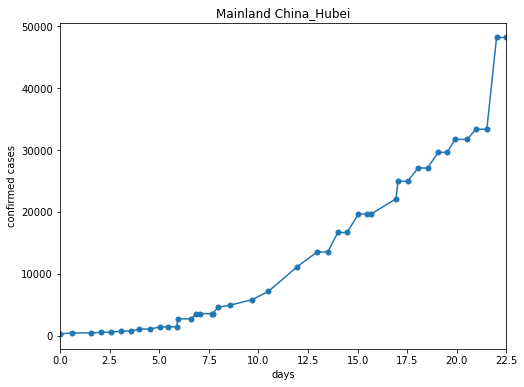

In [58]:
name = "Mainland China_Hubei"
temp_df = confirmed_df_by_days.iloc[name2index[name], :];
plt.figure(figsize=(8,6))
temp_df.plot(title=name, marker='.', markersize=10)
plt.xlabel("days")
plt.ylabel("confirmed cases")
plt.show()

## 死亡人数(Death Cases)

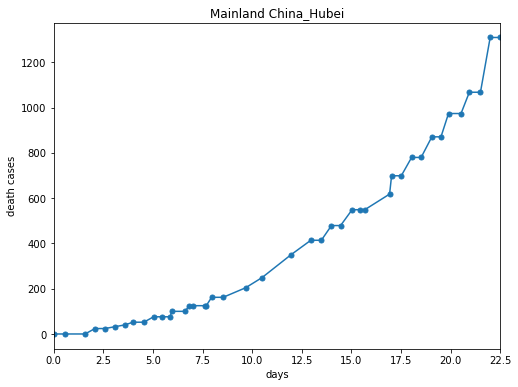

In [59]:
name = "Mainland China_Hubei"
temp_df = death_df_by_days.iloc[name2index[name], :];
plt.figure(figsize=(8,6))
temp_df.plot(title=name, marker='.', markersize=10)
plt.xlabel("days")
plt.ylabel("death cases")
plt.show()

## 死亡率(Death Rate)

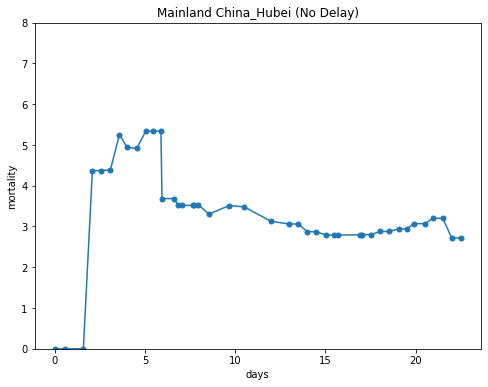

In [60]:
name = "Mainland China_Hubei"
plt.figure(figsize=(8,6))
no_delay_rate = 100*death_df_by_days.iloc[name2index[name], :]/confirmed_df_by_days.iloc[name2index[name], :]
plt.plot(no_delay_rate, marker='.', markersize=10)
plt.xlabel("days")
plt.ylabel("mortality")
plt.ylim(0, 8);
plt.title(name + " (No Delay)")
plt.savefig('hubei_no_delay.png')
plt.show()


<Figure size 432x288 with 0 Axes>

In [61]:
DELAY_DAYS = 3

In [62]:
index2earlierIndex = {}
visited_days = []
ptr = 0
for index, day in enumerate(death_df_by_days):
    if day - DELAY_DAYS >= 0:
        target_day = day - DELAY_DAYS
        while ptr < len(visited_days):
            if visited_days[ptr] <= target_day <= visited_days[ptr+1]:
                if target_day - visited_days[ptr] <= visited_days[ptr+1] - target_day:
                    index2earlierIndex[index] = ptr
                else:
                    index2earlierIndex[index] = ptr + 1
                break
            else:
                ptr += 1
    else:
        index2earlierIndex[index] = None
    visited_days.append(day)

In [63]:
actual_rate = []
cur_rate = None
for index in sorted(index2earlierIndex.keys()):
    earlier_index = index2earlierIndex[index]
    if earlier_index:
        confirm_case = confirmed_df_by_days.iloc[name2index[name], earlier_index]
        death = death_df_by_days.iloc[name2index[name], index]
        cur_rate = round(death/confirm_case*100, 2)
    actual_rate.append(cur_rate)
    

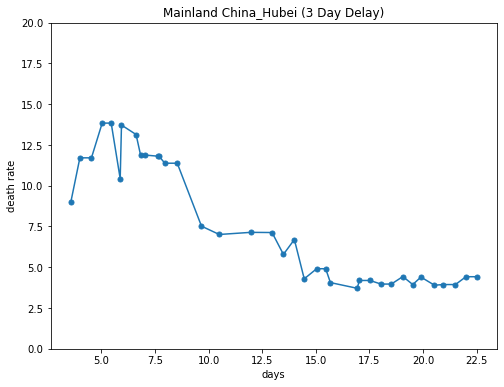

In [339]:
name = "Mainland China_Hubei"
plt.figure(figsize=(8,6))
plt.plot(visited_days, actual_rate, marker='.', markersize=10)
plt.xlabel("days")
plt.ylabel("death rate")
plt.ylim(0, 20);
plt.title(name + " (3 Day Delay)")
plt.show()

In [64]:
DELAY_DAYS = 7

In [65]:
index2earlierIndex = {}
visited_days = []
ptr = 0
name = "Mainland China_Hubei"
for index, day in enumerate(death_df_by_days):
    if day - DELAY_DAYS >= 0:
        target_day = day - DELAY_DAYS
        while ptr < len(visited_days):
            if visited_days[ptr] <= target_day <= visited_days[ptr+1]:
                if target_day - visited_days[ptr] <= visited_days[ptr+1] - target_day:
                    index2earlierIndex[index] = ptr
                else:
                    index2earlierIndex[index] = ptr + 1
                break
            else:
                ptr += 1
    else:
        index2earlierIndex[index] = None
    visited_days.append(day)

In [66]:
actual_rate = []
cur_rate = None
for index in sorted(index2earlierIndex.keys()):
    earlier_index = index2earlierIndex[index]
    if earlier_index:
        confirm_case = confirmed_df_by_days.iloc[name2index[name], earlier_index]
        death = death_df_by_days.iloc[name2index[name], index]
        cur_rate = round(death/confirm_case*100, 2)
    actual_rate.append(cur_rate)

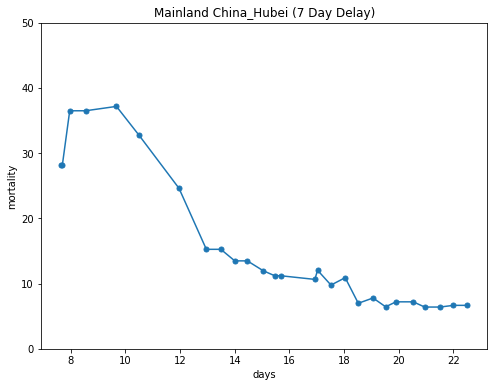

In [67]:
name = "Mainland China_Hubei"
plt.figure(figsize=(8,6))
plt.plot(visited_days, actual_rate, marker='.', markersize=10)
plt.xlabel("days")
plt.ylabel("mortality")
plt.ylim(0, 50);
plt.title("{} ({} Day Delay)".format(name, DELAY_DAYS))
plt.savefig('hubei_7_day.png')
plt.show()

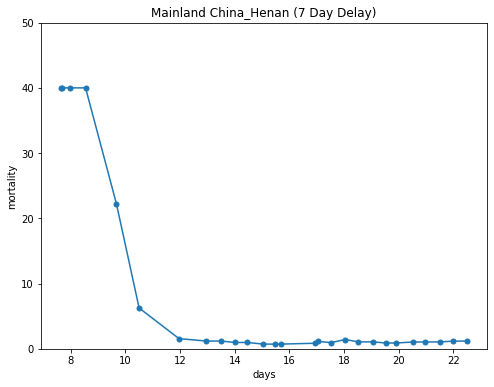

In [68]:
name = "Mainland China_Henan"
actual_rate = []
cur_rate = None
for index in sorted(index2earlierIndex.keys()):
    earlier_index = index2earlierIndex[index]
    if earlier_index:
        confirm_case = confirmed_df_by_days.iloc[name2index[name], earlier_index]
        death = death_df_by_days.iloc[name2index[name], index]
        cur_rate = round(death/confirm_case*100, 2)
    actual_rate.append(cur_rate)
plt.figure(figsize=(8,6))
plt.plot(visited_days, actual_rate, marker='.', markersize=10)
plt.xlabel("days")
plt.ylabel("mortality")
plt.ylim(0, 50);
plt.title("{} ({} Day Delay)".format(name, DELAY_DAYS))
plt.show()

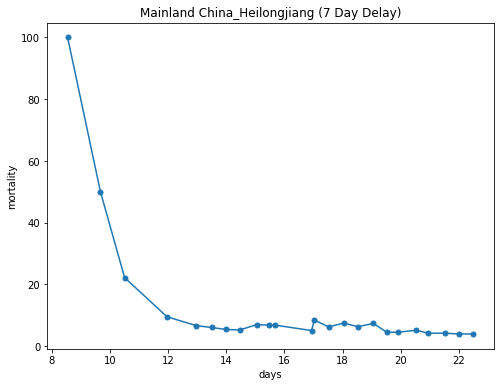

In [69]:
name = "Mainland China_Heilongjiang"
actual_rate = []
cur_rate = None
for index in sorted(index2earlierIndex.keys()):
    earlier_index = index2earlierIndex[index]
    if earlier_index:
        confirm_case = confirmed_df_by_days.iloc[name2index[name], earlier_index]
        death = death_df_by_days.iloc[name2index[name], index]
        if death <= confirm_case:
            cur_rate = round(death/confirm_case*100, 2)
    actual_rate.append(cur_rate)
plt.figure(figsize=(8,6))
plt.plot(visited_days, actual_rate, marker='.', markersize=10)
plt.xlabel("days")
plt.ylabel("mortality")
plt.title("{} ({} Day Delay)".format(name, DELAY_DAYS))
plt.show()

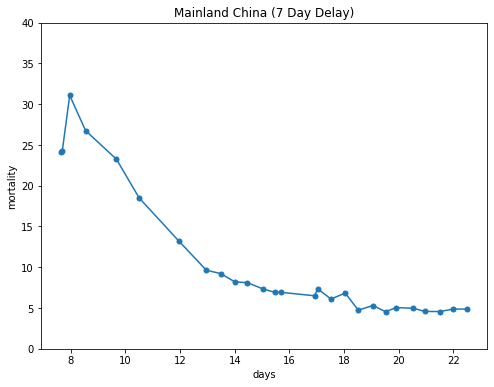

In [409]:
name = "Mainland China"
actual_rate = []
cur_rate = None
for index in sorted(index2earlierIndex.keys()):
    earlier_index = index2earlierIndex[index]
    if earlier_index:
        confirm_case = death = 0
        for keyName in name2index:
            if keyName.startswith("Mainland China"):
                confirm_case += confirmed_df_by_days.iloc[name2index[keyName], earlier_index]
                death += death_df_by_days.iloc[name2index[keyName], index]
        if death <= confirm_case:
            cur_rate = round(death/confirm_case*100, 2)
    actual_rate.append(cur_rate)
plt.figure(figsize=(8,6))
plt.plot(visited_days, actual_rate, marker='.', markersize=10)
plt.xlabel("days")
plt.ylabel("mortality")
plt.ylim(0, 40);
plt.title("{} ({} Day Delay)".format(name, DELAY_DAYS))
plt.savefig('Mainland_China_7_day.png')

plt.show()

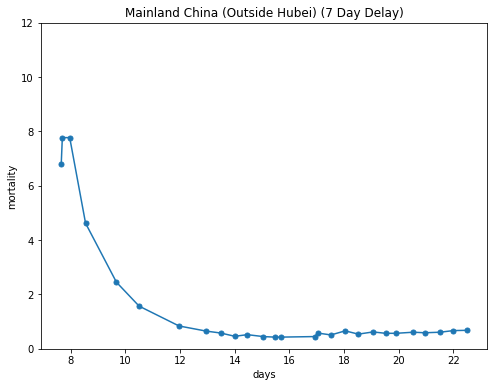

In [70]:
name = "Mainland China (Outside Hubei)"
actual_rate = []
cur_rate = None
for index in sorted(index2earlierIndex.keys()):
    earlier_index = index2earlierIndex[index]
    if earlier_index:
        confirm_case = death = 0
        for keyName in name2index:
            if keyName.startswith("Mainland China") and not keyName.endswith("Hubei"):
                confirm_case += confirmed_df_by_days.iloc[name2index[keyName], earlier_index]
                death += death_df_by_days.iloc[name2index[keyName], index]
        if death <= confirm_case:
            cur_rate = round(death/confirm_case*100, 2)
    actual_rate.append(cur_rate)
plt.figure(figsize=(8,6))
plt.plot(visited_days, actual_rate, marker='.', markersize=10)
plt.xlabel("days")
plt.ylabel("mortality")
plt.ylim(0, 12);
plt.title("{} ({} Day Delay)".format(name, DELAY_DAYS))
plt.savefig('Mainland_China_Except_Hubei_7_day.png')
plt.show()